In [1]:
# or they are being followed by (either of 372 nodes are following) are following them 
    #-- can be checked main G graph (representing follwoing network)

In [64]:
import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import ast

In [429]:
pd.set_option('display.max_colwidth', -1)

In [412]:
# gsubgraph from which we are checking all the followers of the tatto node
G_tattoo_cascade = nx.read_edgelist("tattoo.edgelist",create_using=nx.DiGraph())

In [420]:
# the main spreder of tweet
tattoo_node = '1394686213'

In [421]:
color_map1 = list()
for node in G_tattoo_cascade.nodes():
    if node in tattoo_node:
        color_map1.append("yellow")
    else:
        color_map1.append("red")

In [422]:
color_map1.count("yellow")

1

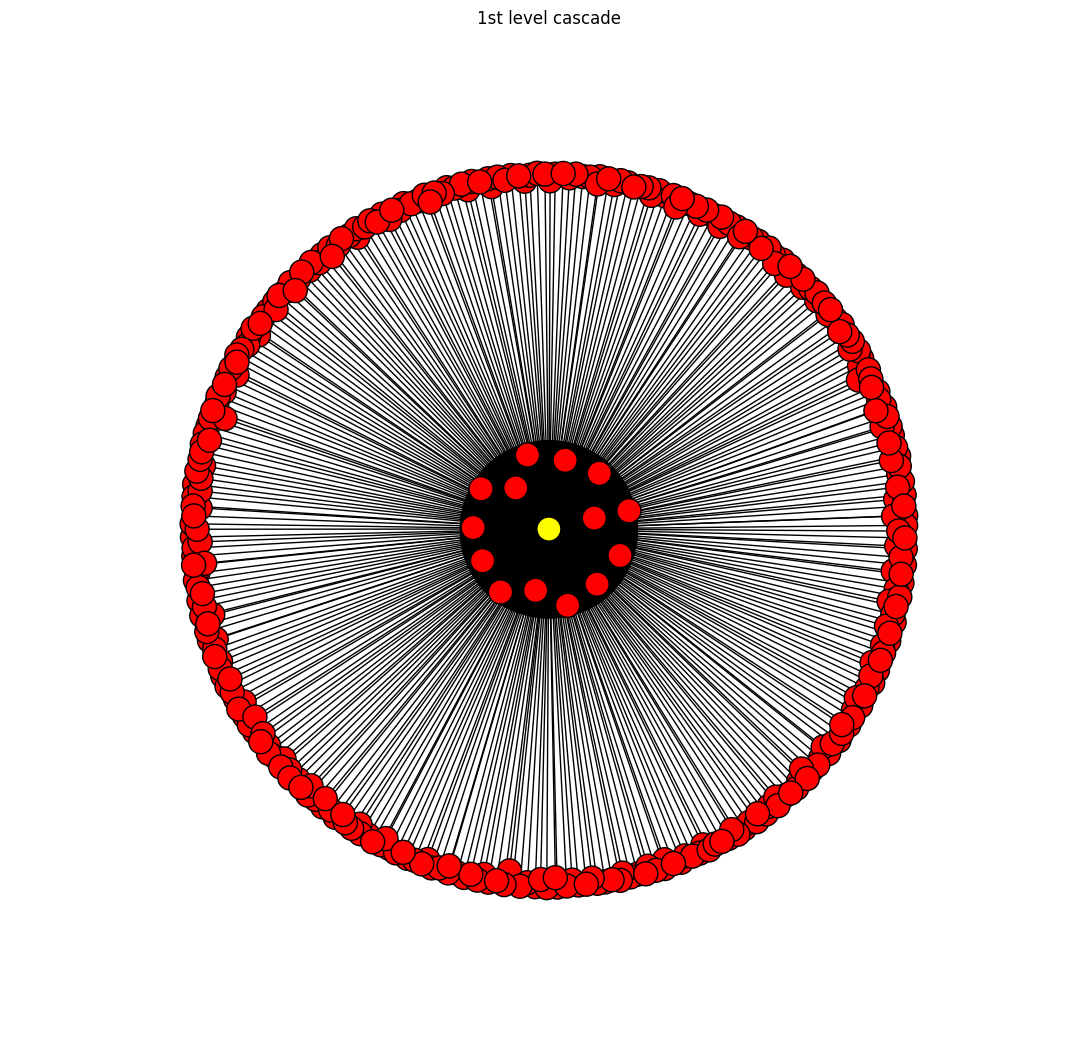

In [424]:
#  simple 1 lvl of cascade for tatto edgelist
plt.figure(figsize=(10,10))
nx.draw(G_tattoo_cascade,node_color=color_map1)
plt.title("1st level cascade")
plt.show()

In [187]:
# the main graph in which 
G = nx.read_edgelist("user-user_c.edgelist",create_using=nx.DiGraph())

In [188]:
tattoo_node = '1394686213'

In [189]:
# getting all incidinet on the tattoo node
first_level_nodes = ([node[1] for node in G_tattoo_cascade.out_edges('1394686213')] + [node[0] for node in G_tattoo_cascade.in_edges('1394686213')])

In [190]:
first_level_nodes = [int(node) for node in first_level_nodes]

In [191]:
# getting the remaining users for level 2
df_user= pd.read_csv("/home/akshayuppal3/hexagonData.csv",lineterminator="\n")

In [192]:
# so we found two tweets based om the above graph that have been retweeted a lot
df_tweets_sub = df_user[df_user['retweetCount'] >=100]
# using the heagon data of the 7k users..

In [193]:
df_tattoo = df_tweets_sub[df_tweets_sub.retweetCount == 781]
len(df_tattoo.userID.unique())

598

In [430]:
df_source = df_tattoo.sort("tweetCreatedAt").head(1)
df_source.tweetText

/home/akshayuppal3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


3853    Team tatted... 😤🤘🏻 Yup!!! 🤬🤬🤬🤬 Hurt like a bitch but it was so worth it.  🤑🤑🤑🤑 #juul #tattoo #CaptionThis https://t.co/88RXkzY6Oe
Name: tweetText, dtype: object

In [194]:
## 598 -358  = 240
rem_users = set(df_tattoo.userID.unique()) - set(first_level_nodes)
# so these users dont have a direct conenction with the tattoo node so we will look at the following graph of the first
# level node and check if they are present in their following network

In [195]:
# reming the source from reamining node..
rem_users.remove(int(tattoo_node))

In [196]:
len(rem_users)

239

In [197]:
rem_users = [str(node) for node in rem_users]
first_level_nodes = [str(node) for node in first_level_nodes]

In [207]:
blue_users = list()
with open("tattoo_1_lvl_following.edgelist","w+") as f:
    for node in tqdm(first_level_nodes):
        # get the following .. hence the outdegree of those nodes
        if (node) in G.nodes():
            following = [i[1] for i in G.out_edges(node)]
            for user in rem_users:
                if (user) in following:
                    if user not in blue_users:
                        blue_users.append(user)
                    f.write(node + ' ' + user +'\n')





  0%|          | 0/372 [00:00<?, ?it/s]



100%|██████████| 372/372 [00:00<00:00, 4804.46it/s]

In [6]:
G_test = nx.read_edgelist("tattoo_1_lvl_following.edgelist",create_using=nx.DiGraph())

In [7]:
len(G_test.edges())

39

In [55]:
G_tattoo_cascade.add_edges_from(G_test.edges())

In [56]:
color_map = list()
for node in G_tattoo_cascade.nodes():
    if node != (tattoo_node):
        if node in rem_users:
            color_map.append("blue")
        else:
            color_map.append("red")
    else:
        color_map.append("yellow")

In [57]:
color_map.count('blue')

31

In [9]:
len(G_tattoo_cascade.edges())

411

In [10]:
## so 598 - 411 = 187 so we still remain these nodes might get from the following network

In [77]:
## so lets try with the remaining followers network
followers_network = pd.read_csv("~/twitter_juul/input/followers_tattoo",index_col=0)

In [78]:
len(followers_network)

352

In [79]:
first_level_users = list(followers_network.userID)

In [110]:
print(len(rem_users))

239


In [111]:
rem_users = list(rem_users)

In [113]:
with open("tatto_1st_lvl_followers.edgelist","w+") as f:
    pink_users = list()
    for node in tqdm(first_level_users):
        for user in rem_users:
            followers = ast.literal_eval(followers_network.followers_list[followers_network.userID == node].values[0])[0]
            if user in set(followers):
                f.write(str(user) + " " + str(node) +"\n")
                pink_users.append(user)





  0%|          | 0/352 [00:00<?, ?it/s]



  0%|          | 1/352 [00:00<02:23,  2.45it/s]



  1%|          | 2/352 [00:00<02:16,  2.57it/s]



  1%|          | 3/352 [00:01<02:23,  2.43it/s]



  1%|          | 4/352 [00:01<02:28,  2.35it/s]



  1%|▏         | 5/352 [00:01<02:15,  2.56it/s]



  2%|▏         | 6/352 [00:02<02:03,  2.80it/s]



  2%|▏         | 7/352 [00:02<02:25,  2.38it/s]



  2%|▏         | 8/352 [00:03<02:14,  2.56it/s]



  3%|▎         | 9/352 [00:03<02:03,  2.78it/s]



  3%|▎         | 10/352 [00:06<06:46,  1.19s/it]



  3%|▎         | 11/352 [00:06<05:14,  1.09it/s]



  3%|▎         | 12/352 [00:07<05:01,  1.13it/s]



  4%|▎         | 13/352 [00:07<04:01,  1.41it/s]



  4%|▍         | 14/352 [00:08<03:35,  1.57it/s]



  4%|▍         | 15/352 [00:08<03:13,  1.74it/s]



  5%|▍         | 16/352 [00:09<02:53,  1.94it/s]



  5%|▍         | 17/352 [00:09<02:41,  2.07it/s]



  5%|▌         | 18/352 [00:09<02:23,  2.33it/s]



  5%|▌         | 19/352 [0

In [141]:
G_temp =  nx.read_edgelist("tatto_1st_lvl_followers.edgelist",create_using=nx.DiGraph())

In [154]:
G_temp.out_edges(pink_users[2])

[('1450146066', '297159787')]

In [431]:
# gsubgraph from which we are checking all the followers of the tatto node
G_tattoo_cascade = nx.read_edgelist("tattoo.edgelist",create_using=nx.DiGraph())

In [432]:
G_tattoo_cascade.add_edges_from(G_temp.edges())

In [433]:
G_tattoo_cascade.add_edges_from(G_test.edges())

In [200]:
rem_users = [str(user) for user in rem_users]
pink_users = [str(user) for user in pink_users]

In [324]:
pink_users = list(set(pink_users) - set(blue_users))

In [216]:
len(blue_users)

31

In [169]:
len(G_temp.edges())

36

In [234]:
len(G_tattoo_cascade.edges())

447

In [291]:
d = nx.degree(G_tattoo_cascade)
node_size=[(k,(v * 100)) for k,v in d.items()]

In [293]:
nodes = [node[0] for node in node_size]
node_sizes = [node[1] for node in node_size]

In [295]:
color_map = list()
for node in nodes:
    if node != (tattoo_node):
        if node in rem_users:
            if node in pinks_users:
                color_map.append("pink")
            else:
                color_map.append("blue")
        else:
            color_map.append("red")
    else:
        color_map.append("yellow")

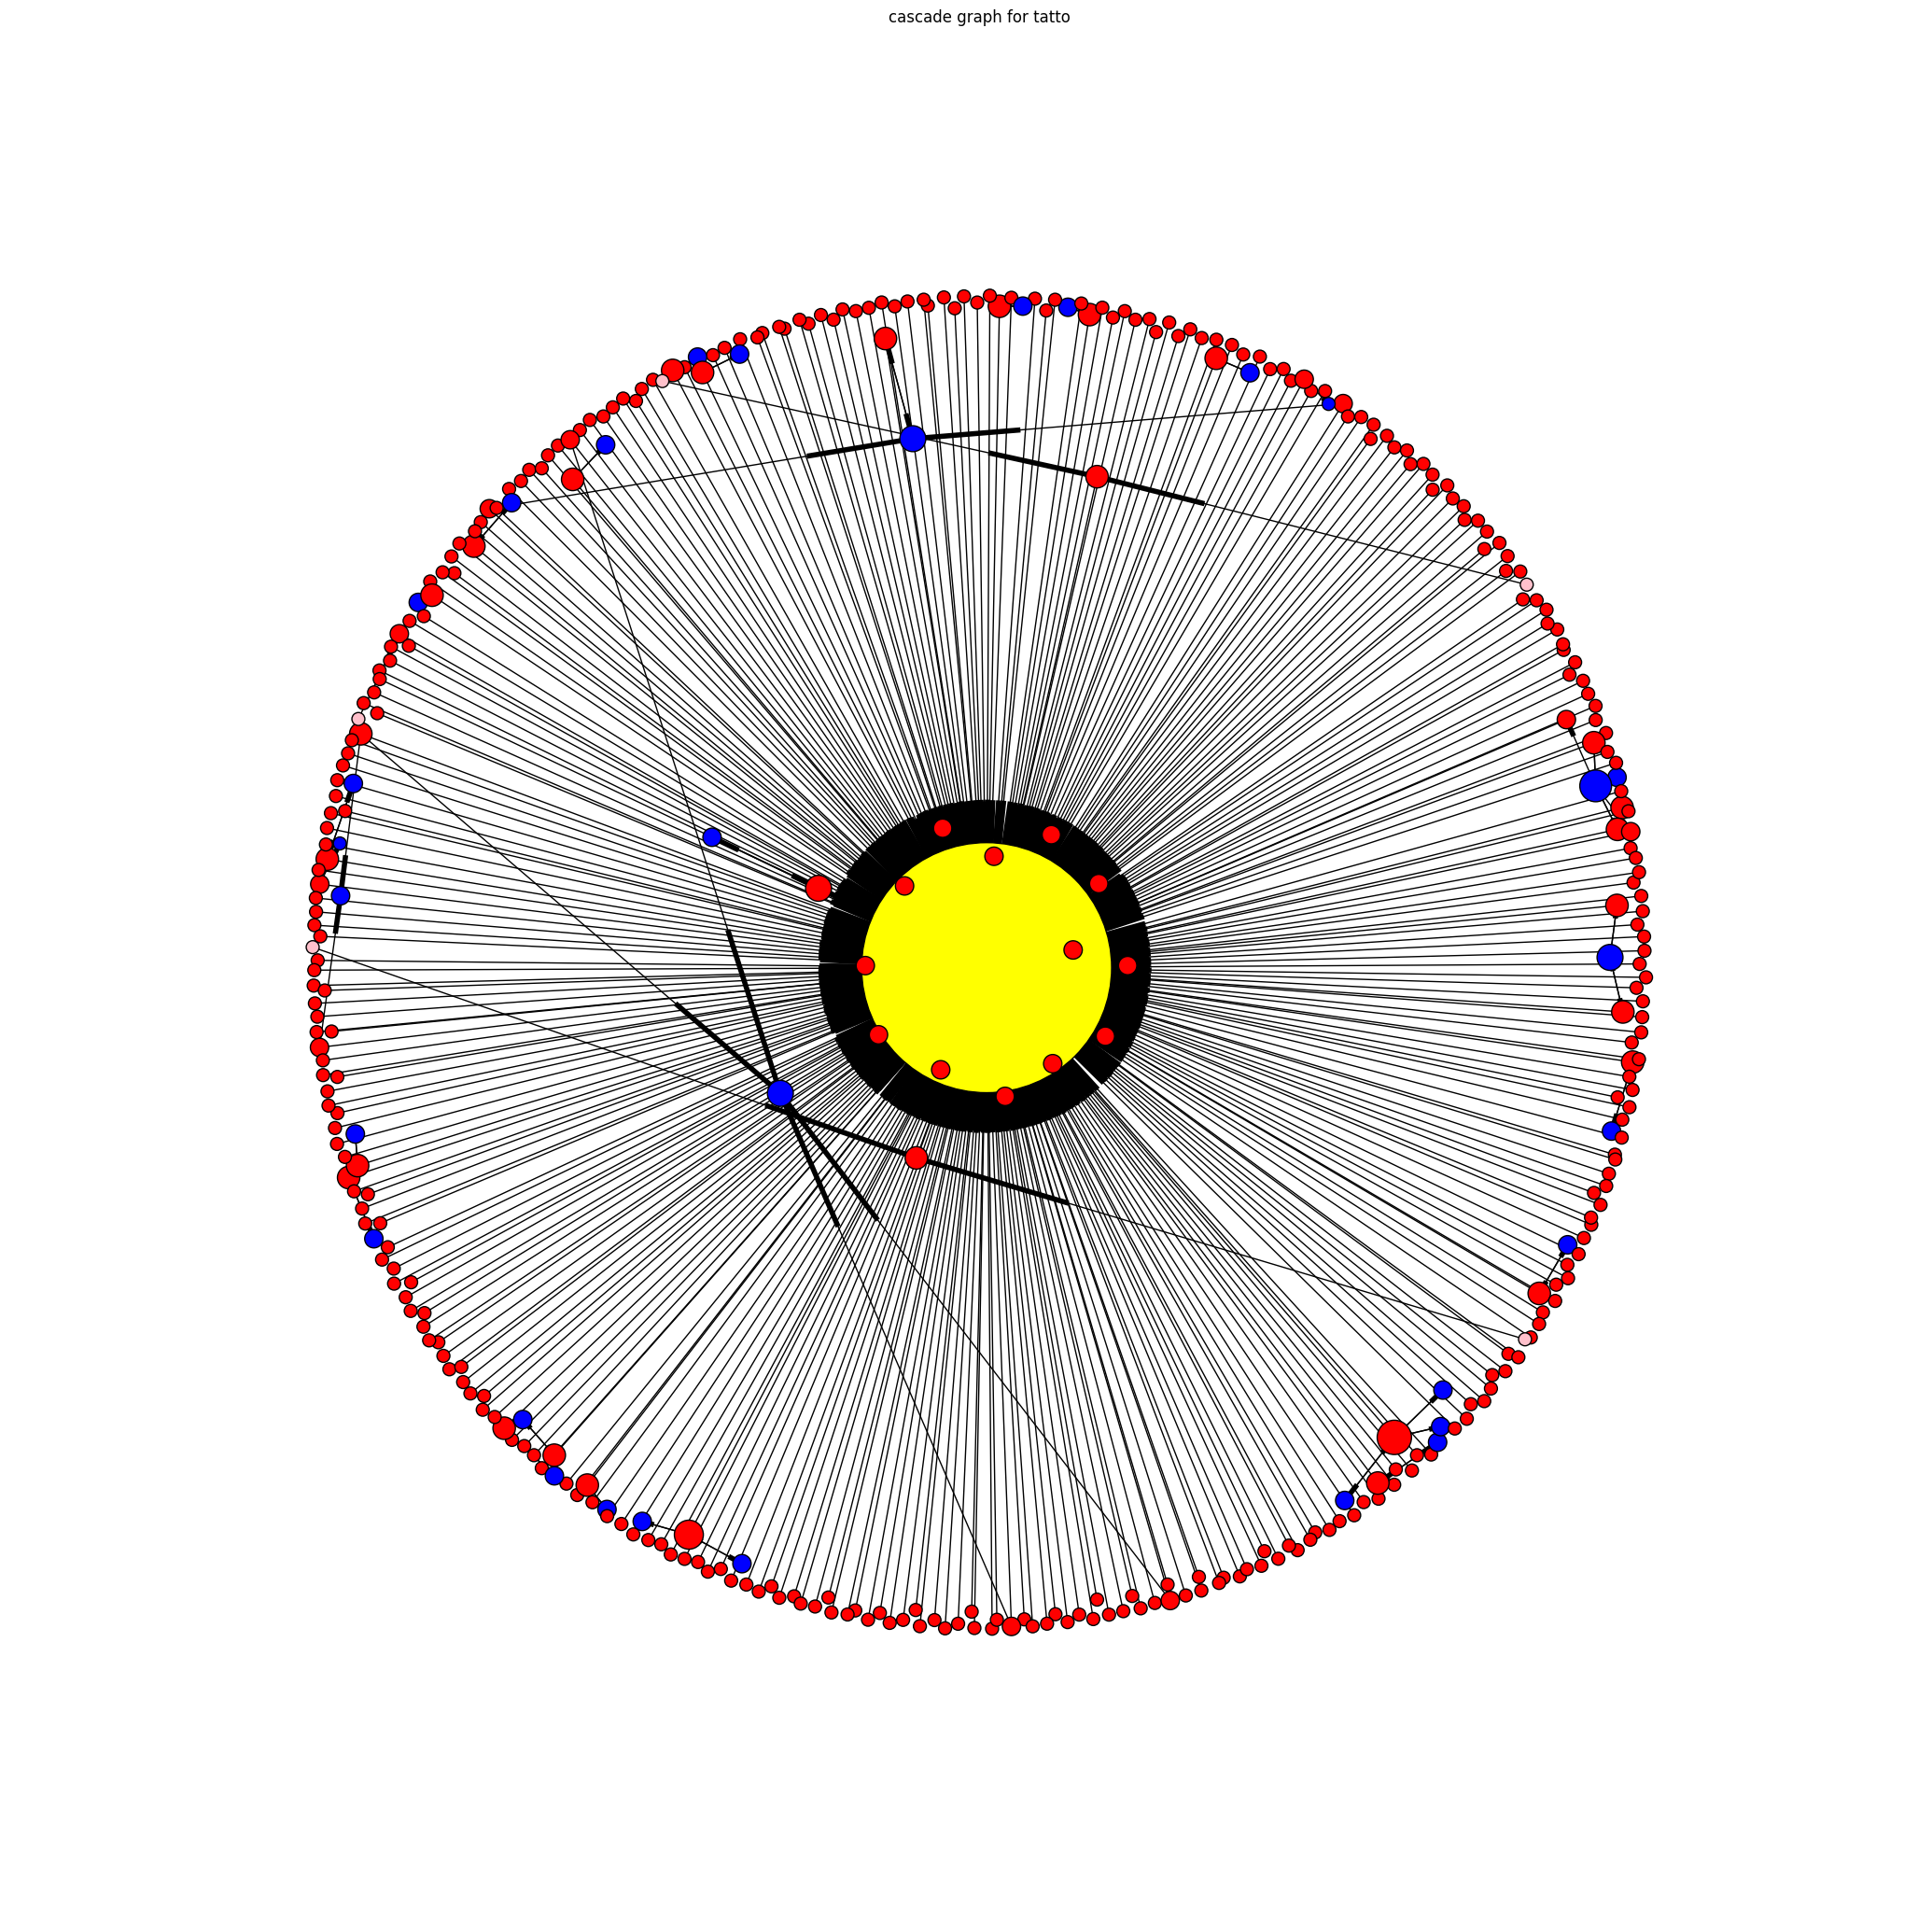

In [299]:
# 2nd level cascade with followers
plt.figure(figsize=(20,20))
d = nx.degree(G_tattoo_cascade)
nx.draw(G_tattoo_cascade,node_color= color_map, nodelist=d.keys(), node_size=node_sizes)
plt.title("cascade graph for tatto")
plt.show()

In [362]:
red_nodes = list(set(G_tattoo_cascade.nodes()) - set([tattoo_node]) - set(pink_users) -set(blue_users))

In [374]:
front_face = [tattoo_node]
middle_face = red_ßnodes
back_face = pink_users + blue_users

In [379]:
shells =[front_face] + [middle_face] + [back_face]
positions = nx.shell_layout(G_tattoo_cascade, shells)

In [387]:
all_nodes = front_face + middle_face + back_face

In [435]:
color_map = list()
for node in positions.keys():
    if node in front_face:
         color_map.append("yellow")
    elif node in middle_face:
        color_map.append("red")
    elif node in back_face:
        if node in pinks_users:
            color_map.append("pink")
        else:
            color_map.append("blue")

In [436]:
color_map.count("red")

358

In [437]:
color_map.count("blue")

31

In [438]:
color_map.count("pink")

5

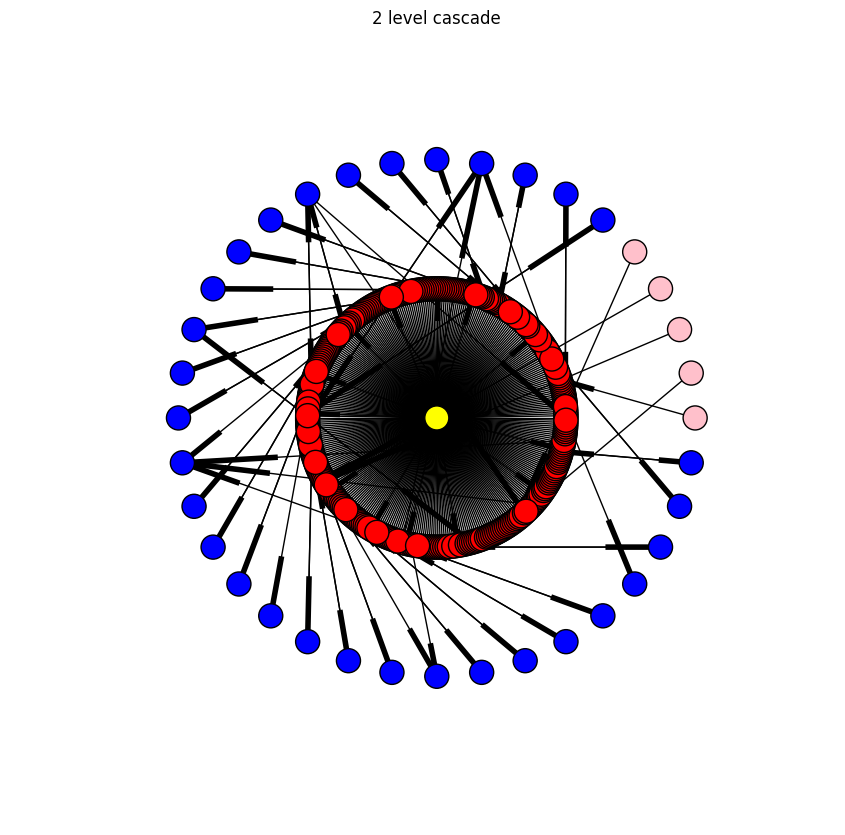

In [405]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G_tattoo_cascade, pos=positions,nodelist=positions.keys(),with_labels=False,node_color=color_map)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
plt.title("2 level cascade")
plt.show()

In [434]:
len(G_tattoo_cascade.edges())

447